In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression # Corrected import
import sklearn.model_selection
from sklearn.model_selection import train_test_split # Added for clarity
import sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score # Added for clarity

In [2]:
url={"https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"}

In [3]:
dataset=pd.read_csv(list(url)[0])

In [10]:
print(dataset.head(30)[dataset.columns[:12]].to_string())

        country  year iso_code  population  gdp  cement_co2  cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  co2_including_luc  co2_including_luc_growth_abs
0   Afghanistan  1750      AFG   2802560.0  NaN         0.0                    0.0  NaN             NaN              NaN                NaN                           NaN
1   Afghanistan  1751      AFG         NaN  NaN         0.0                    NaN  NaN             NaN              NaN                NaN                           NaN
2   Afghanistan  1752      AFG         NaN  NaN         0.0                    NaN  NaN             NaN              NaN                NaN                           NaN
3   Afghanistan  1753      AFG         NaN  NaN         0.0                    NaN  NaN             NaN              NaN                NaN                           NaN
4   Afghanistan  1754      AFG         NaN  NaN         0.0                    NaN  NaN             NaN              NaN                NaN           

In [11]:
filtereddataset = dataset[dataset['year']>=2010].copy() # Create a copy
filtereddataset['gdp_per_capita'] = filtereddataset['gdp'] / filtereddataset['population']

print(filtereddataset.columns.tolist())

['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 

In [17]:
data_country = filtereddataset.groupby('country').agg({
    'co2': 'sum',
    'co2_per_capita': 'mean',
    'gdp_per_capita': 'mean',
    'population': 'mean',
    'energy_per_capita': 'mean',
    'cement_co2': 'sum'

}).reset_index()

In [18]:
data_country.head(10)

,country,co2,co2_per_capita,gdp_per_capita,population,energy_per_capita,cement_co2
0,Afghanistan,147.488,0.278533,1784.954405,3.567854e+07,1099.725643,0.491
1,Africa,20601.480,1.074000,NaN,1.286946e+09,4158.439533,1139.395
2,Africa (GCP),20601.311,NaN,NaN,NaN,NaN,0.000
3,Albania,74.448,1.723133,10613.147742,2.879211e+06,8634.828857,15.083
4,Algeria,2459.896,3.919600,13332.986371,4.159835e+07,14955.123000,152.556
5,Andorra,6.890,5.993867,NaN,7.683520e+04,NaN,0.000
6,Angola,347.049,0.787400,5411.482065,3.036799e+07,3095.814571,18.222
7,Anguilla,1.996,9.373067,NaN,1.417560e+04,NaN,0.000
8,Antarctica,0.000,NaN,NaN,NaN,NaN,0.000
9,Antigua and Barbuda,9.004,6.650200,NaN,9.014720e+04,32957.848500,0.000


In [12]:
data_year = filtereddataset.groupby('year').agg({
    'co2': 'sum',
    'co2_per_capita': 'mean',
    'gdp_per_capita': 'mean',
    'population': 'mean',
    'energy_per_capita': 'mean',
    'cement_co2': 'sum'

}).reset_index()

In [13]:
data_year.head()

,year,co2,co2_per_capita,gdp_per_capita,population,energy_per_capita,cement_co2
0,2010,215282.690,5.290983,16586.581111,1.245339e+08,26060.910407,5524.944
1,2011,222245.218,5.296506,17119.478931,1.260954e+08,25632.964565,5918.068
2,2012,225327.174,5.292411,17337.531634,1.276748e+08,25721.458429,6054.148
3,2013,226877.061,5.188489,17476.910770,1.292589e+08,25638.375415,6320.625
4,2014,227609.269,5.118805,17648.086774,1.308302e+08,25440.191341,6541.691


In [19]:
#removing null
data_country.dropna(inplace=True)
data_year.dropna(inplace=True)

In [20]:
#describe the data_country and data_year
print("Describe data_country:")
display(data_country.describe())

print("\nDescribe data_year:")
display(data_year.describe())


Describe data_country:


,co2,co2_per_capita,gdp_per_capita,population,energy_per_capita,cement_co2
count,165.000000,165.000000,165.000000,1.650000e+02,165.000000,165.000000
mean,6442.618958,4.738450,17929.874965,9.179127e+07,26120.248567,271.005206
std,44116.772630,5.911229,19423.027610,6.101227e+08,35683.596200,1934.523827
min,1.965000,0.045733,692.730043,6.841887e+04,220.251214,0.000000
25%,95.092000,0.798467,3817.331933,4.237784e+06,3326.936929,3.932000
50%,347.049000,2.601200,11975.643532,1.072827e+07,14011.527286,15.083000
75%,1487.076000,6.255200,24231.403450,3.224214e+07,33672.310667,49.948000
max,540330.930000,40.151533,143739.052983,7.622646e+09,213976.767733,22369.815000



Describe data_year:


,year,co2,co2_per_capita,gdp_per_capita,population,energy_per_capita,cement_co2
count,13.00000,13.000000,13.000000,13.000000,1.300000e+01,13.000000,13.000000
mean,2016.00000,229126.453462,5.017810,17934.387248,1.336937e+08,25351.422350,6535.446462
std,3.89444,6904.945857,0.230366,729.647855,5.769780e+06,635.558841,514.722087
min,2010.00000,215282.690000,4.573874,16586.581111,1.245339e+08,23778.861691,5524.944000
25%,2013.00000,226123.155000,4.914758,17476.910770,1.292589e+08,25440.191341,6320.625000
50%,2016.00000,227241.886000,5.017857,17790.673236,1.339294e+08,25572.853046,6541.691000
75%,2019.00000,235325.126000,5.188489,18590.486821,1.383553e+08,25671.218032,6934.729000
max,2022.00000,240370.227000,5.296506,19129.664718,1.420330e+08,26060.910407,7312.216000


In [21]:
from sklearn.preprocessing import StandardScaler

# Standardize data_year
# Exclude non-numeric columns like 'year' and 'country'
numeric_cols_year = data_year.select_dtypes(include=np.number).columns.tolist()
scaler_year = StandardScaler()
data_year_scaled = scaler_year.fit_transform(data_year[numeric_cols_year])
data_year_scaled = pd.DataFrame(data_year_scaled, columns=numeric_cols_year)

# Standardize data_country
# Exclude non-numeric columns like 'country'
numeric_cols_country = data_country.select_dtypes(include=np.number).columns.tolist()
scaler_country = StandardScaler()
data_country_scaled = scaler_country.fit_transform(data_country[numeric_cols_country])
data_country_scaled = pd.DataFrame(data_country_scaled, columns=numeric_cols_country)

print("Standardized data_year:")
display(data_year_scaled.head())

print("\nStandardized data_country:")
display(data_country_scaled.head())

Standardized data_year:


,year,co2,co2_per_capita,gdp_per_capita,population,energy_per_capita,cement_co2
0,-1.603567,-2.086772,1.234241,-1.922628,-1.652367,1.161904,-2.043363
1,-1.336306,-1.037259,1.259199,-1.162456,-1.370682,0.461072,-1.248417
2,-1.069045,-0.572693,1.240696,-0.851407,-1.085776,0.605995,-0.973246
3,-0.801784,-0.339067,0.771158,-0.652584,-0.800017,0.469933,-0.434396
4,-0.534522,-0.228696,0.456313,-0.408404,-0.516559,0.145374,0.012627



Standardized data_country:


,co2,co2_per_capita,gdp_per_capita,population,energy_per_capita,cement_co2
0,-0.143127,-0.756779,-0.833756,-0.092250,-0.703312,-0.140261
1,-0.144787,-0.511653,-0.377850,-0.146172,-0.491504,-0.132695
2,-0.090552,-0.138946,-0.237393,-0.082517,-0.313845,-0.061416
3,-0.138590,-0.670432,-0.646475,-0.100980,-0.647203,-0.131067
4,-0.083600,-0.090812,0.050032,-0.078654,-0.117193,-0.105636


In [22]:
data_country_scaled = pd.concat([data_country[['country']], data_country_scaled], axis=1)

data_year_scaled = pd.concat([data_year[['year']], data_year_scaled.drop(columns=['year'])], axis=1)

print("Combined data_country_scaled:")
display(data_country_scaled.head())

print("\nCombined data_year_scaled:")
display(data_year_scaled.head())

Combined data_country_scaled:


,country,co2,co2_per_capita,gdp_per_capita,population,energy_per_capita,cement_co2
0,Afghanistan,-0.143127,-0.756779,-0.833756,-0.092250,-0.703312,-0.140261
3,Albania,-0.138590,-0.670432,-0.646475,-0.100980,-0.647203,-0.131067
4,Algeria,-0.083600,-0.090812,0.050032,-0.078654,-0.117193,-0.105636
6,Angola,-0.010066,1.966681,1.546560,-0.110465,1.098233,-0.116661
10,Argentina,-0.118343,-0.718351,-0.732426,0.115922,-0.665124,-0.131716



Combined data_year_scaled:


,year,co2,co2_per_capita,gdp_per_capita,population,energy_per_capita,cement_co2
0,2010,-2.086772,1.234241,-1.922628,-1.652367,1.161904,-2.043363
1,2011,-1.037259,1.259199,-1.162456,-1.370682,0.461072,-1.248417
2,2012,-0.572693,1.240696,-0.851407,-1.085776,0.605995,-0.973246
3,2013,-0.339067,0.771158,-0.652584,-0.800017,0.469933,-0.434396
4,2014,-0.228696,0.456313,-0.408404,-0.516559,0.145374,0.012627


In [23]:
# Remove 'World' and NaN entries from countries
data_country_clean = data_country_scaled[~data_country_scaled['country'].isin(['World'])]
data_country_clean = data_country_clean.dropna(subset=['country'])

print("Cleaned number of countries:", data_country_clean['country'].nunique())
print("\nSample cleaned countries:", data_country_clean['country'].unique()[:10])


Cleaned number of countries: 164

Sample cleaned countries: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain']


In [24]:
# Define mapping of countries to regions (simplified)
region_map = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cameroon': 'Africa', 'Cape Verde': 'Africa',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Comoros': 'Africa', 'Congo': 'Africa',
    'Democratic Republic of Congo': 'Africa', 'Djibouti': 'Africa', 'Egypt': 'Africa',
    'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Ghana': 'Africa',
    'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Ivory Coast': 'Africa', "Cote d'Ivoire": 'Africa',
    'Kenya': 'Africa', 'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa',
    'Mauritius': 'Africa', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa',
    'Niger': 'Africa', 'Nigeria': 'Africa', 'Rwanda': 'Africa', 'Sao Tome and Principe': 'Africa',
    'Senegal': 'Africa', 'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'South Africa': 'Africa',
    'Sudan': 'Africa', 'Tanzania': 'Africa', 'Togo': 'Africa', 'Tunisia': 'Africa',
    'Uganda': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Brunei': 'Asia', 'Cambodia': 'Asia',
    'China': 'Asia', 'Cyprus': 'Asia', 'Georgia': 'Asia', 'India': 'Asia',
    'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia',
    'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Lebanon': 'Asia', 'Malaysia': 'Asia',
    'Maldives': 'Asia', 'Mongolia': 'Asia', 'Myanmar': 'Asia', 'Nepal': 'Asia',
    'North Korea': 'Asia', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Palestine': 'Asia',
    'Philippines': 'Asia', 'Qatar': 'Asia', 'Saudi Arabia': 'Asia', 'Singapore': 'Asia',
    'South Korea': 'Asia', 'Sri Lanka': 'Asia', 'Syria': 'Asia', 'Taiwan': 'Asia',
    'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Turkey': 'Asia',
    'Turkmenistan': 'Asia', 'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia',
    'Vietnam': 'Asia', 'Yemen': 'Asia', 'Hong Kong': 'Asia',

    # Europe
    'Albania': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe', 'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe', 'Croatia': 'Europe',
    'Czechia': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe', 'Finland': 'Europe',
    'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe', 'Latvia': 'Europe',
    'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Malta': 'Europe', 'Moldova': 'Europe',
    'Montenegro': 'Europe', 'Netherlands': 'Europe', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe',
    'Russia': 'Europe', 'Serbia': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Ukraine': 'Europe',
    'United Kingdom': 'Europe',

    # Americas
    'Argentina': 'Americas', 'Barbados': 'Americas', 'Belize': 'Americas', 'Bolivia': 'Americas',
    'Brazil': 'Americas', 'Canada': 'Americas', 'Chile': 'Americas', 'Colombia': 'Americas',
    'Costa Rica': 'Americas', 'Cuba': 'Americas', 'Dominica': 'Americas',
    'Dominican Republic': 'Americas', 'Ecuador': 'Americas', 'El Salvador': 'Americas',
    'Guatemala': 'Americas', 'Haiti': 'Americas', 'Honduras': 'Americas', 'Jamaica': 'Americas',
    'Mexico': 'Americas', 'Nicaragua': 'Americas', 'Panama': 'Americas', 'Paraguay': 'Americas',
    'Peru': 'Americas', 'Saint Lucia': 'Americas', 'Trinidad and Tobago': 'Americas',
    'United States': 'Americas', 'Uruguay': 'Americas', 'Venezuela': 'Americas',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania',
}

# Add region column
data_country_clean['region'] = data_country_clean['country'].map(region_map)

# Check mapping
print(data_country_clean[['country', 'region']].drop_duplicates().head(20))


                   country    region
0              Afghanistan      Asia
3                  Albania    Europe
4                  Algeria    Africa
6                   Angola    Africa
10               Argentina  Americas
11                 Armenia      Asia
16               Australia   Oceania
17                 Austria    Europe
18              Azerbaijan      Asia
20                 Bahrain      Asia
21              Bangladesh      Asia
22                Barbados  Americas
23                 Belarus    Europe
24                 Belgium    Europe
26                   Benin    Africa
29                 Bolivia  Americas
31  Bosnia and Herzegovina    Europe
32                Botswana    Africa
33                  Brazil  Americas
36                Bulgaria    Europe


In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Apply PCA on standardized country data
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pca', PCA(n_components=2))
])

X = data_country_clean.drop(columns=['country','region'])
pca_result = pipeline.fit_transform(X)


# Create DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['country'] = data_country_clean['country']
pca_df['region'] = data_country_clean['region']


In [26]:

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Apply PCA on standardized country data
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pca', PCA(n_components=2))
])

X = data_country_clean.drop(columns=['country','region'])
pca_result = pipeline.fit_transform(X)


# Create DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['country'] = data_country_clean['country']
pca_df['region'] = data_country_clean['region']


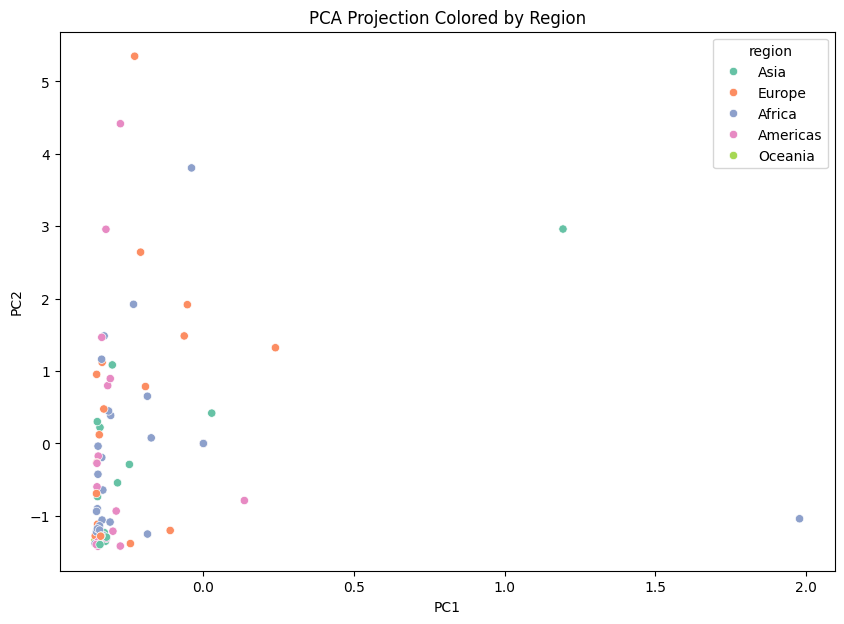

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='region', palette='Set2')
plt.title("PCA Projection Colored by Region")
plt.show()

In [28]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Apply PCA on standardized country data
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pca', PCA(n_components=2))
])

X = data_year_scaled.drop(columns=['year'])
pca_result = pipeline.fit_transform(X)


# Create DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['year'] = data_year_scaled['year']


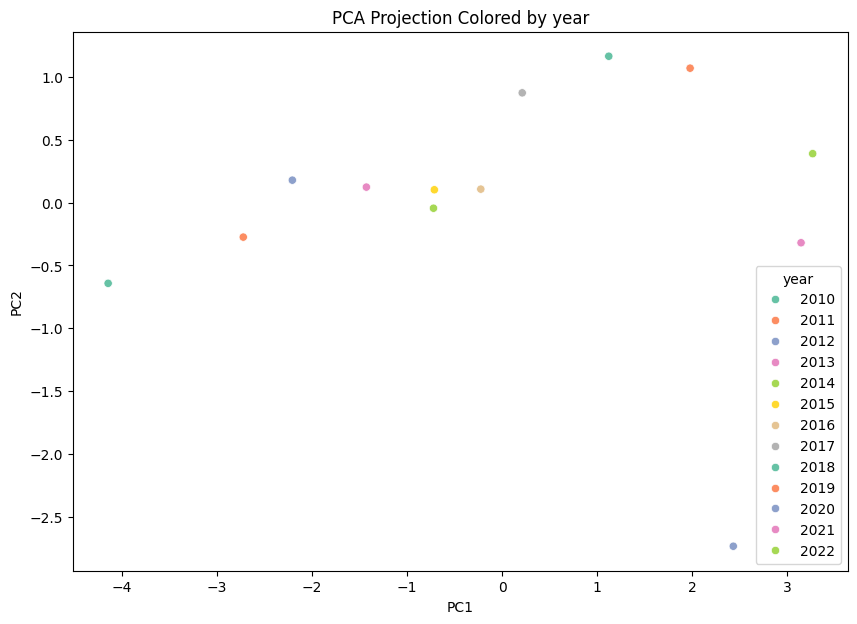

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='year', palette='Set2')
plt.title("PCA Projection Colored by year")
plt.show()

### Analysis of PCA Results

Based on the PCA projections colored by region and year, we can make the following observations regarding clustering and patterns:

#### PCA Projection Colored by Region

Looking at the plot where points are colored by region:

*   There appears to be some degree of clustering based on region, but it is not perfectly separated.
*   Countries within the same region tend to be closer to each other in the PCA space compared to countries from different regions, although there is significant overlap.
*   Some regions, like Oceania (Australia and New Zealand), appear somewhat distinct, while others, like Asia and Europe, show more overlap. This suggests that while regional factors contribute to the variation in the data, they are not the sole determinants of a country's position in the PCA space.

#### PCA Projection Colored by Year

Looking at the plot where points are colored by year:

*   There is a clear and strong pattern of progression over time. The points form a roughly diagonal line, with earlier years (2010-2014) generally positioned towards the bottom-left and later years (2019-2022) moving towards the top-right.
*   This indicates that the largest variations captured by PC1 and PC2 are strongly correlated with time.
*   The lack of distinct clusters by year, but rather a continuous trajectory, suggests a steady evolution of the factors represented by these principal components over the decade.

In summary, the PCA analysis reveals both some regional tendencies in the data and a significant temporal trend. While regions show some degree of clustering, the year-based PCA highlights a more pronounced pattern of change over time captured by the first two principal components.

##kernal pca

Applying Kernel PCA (RBF kernel) to data_country_clean...


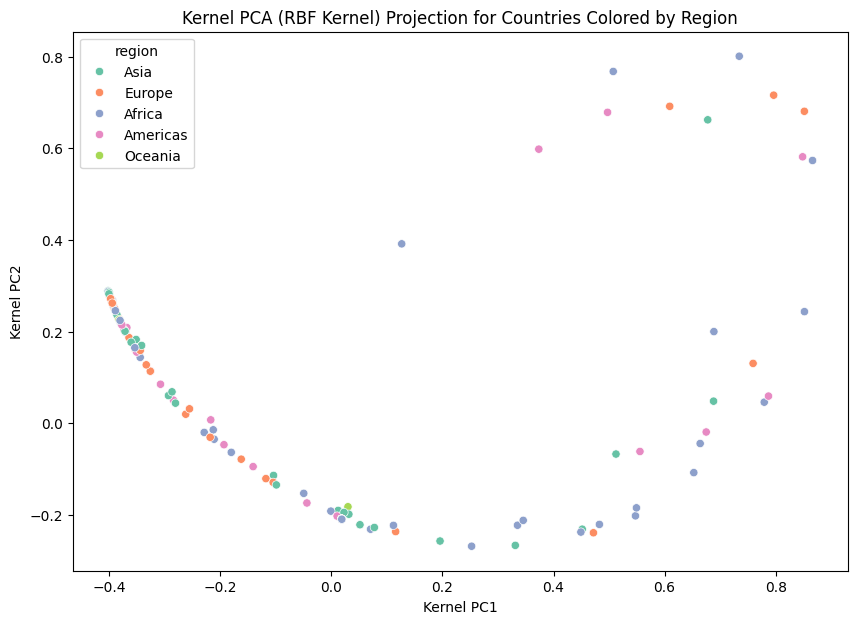

Kernel PCA with RBF kernel on country data applied and plotted successfully.

Applying Kernel PCA (RBF kernel) to data_year_scaled...


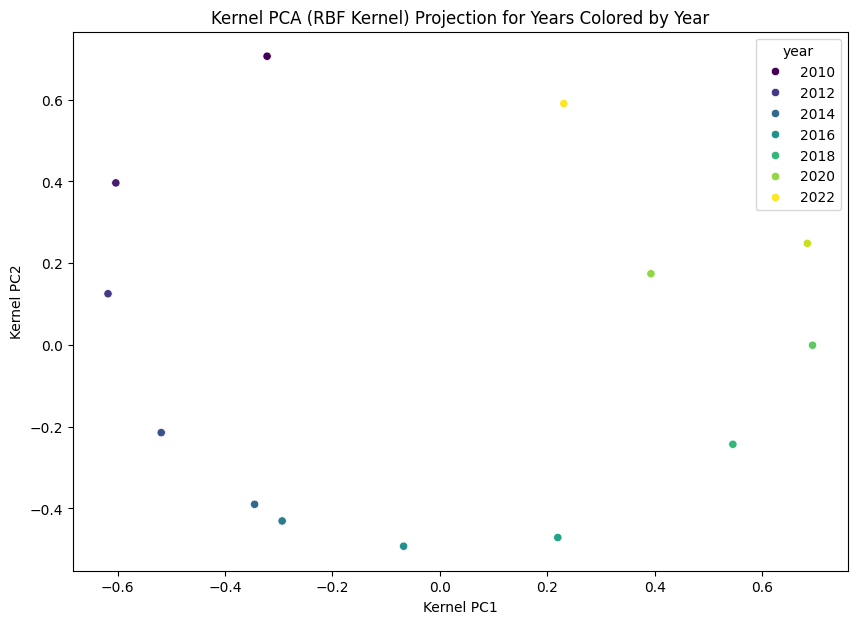

Kernel PCA with RBF kernel on year data applied and plotted successfully.


In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Kernel PCA to data_country_clean (RBF kernel)
print("Applying Kernel PCA (RBF kernel) to data_country_clean...")
try:
    pipeline_country_rbf = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('kpca', KernelPCA(n_components=2, kernel='rbf'))
    ])
    numeric_data_country = data_country_clean.select_dtypes(include=np.number)
    kpca_country_rbf_result = pipeline_country_rbf.fit_transform(numeric_data_country)

    # Create DataFrame with Kernel PCA results
    kpca_country_rbf_df = pd.DataFrame(kpca_country_rbf_result, columns=['KPC1', 'KPC2'])
    kpca_country_rbf_df['country'] = data_country_clean['country'].reset_index(drop=True)
    kpca_country_rbf_df['region'] = data_country_clean['region'].reset_index(drop=True)

    # Visualize Kernel PCA results for country data (RBF kernel)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=kpca_country_rbf_df, x='KPC1', y='KPC2', hue='region', palette='Set2')
    plt.title("Kernel PCA (RBF Kernel) Projection for Countries Colored by Region")
    plt.xlabel("Kernel PC1")
    plt.ylabel("Kernel PC2")
    plt.show()
    print("Kernel PCA with RBF kernel on country data applied and plotted successfully.")

except Exception as e:
    print(f"Error applying Kernel PCA with RBF kernel on country data: {e}")


# Apply Kernel PCA to data_year_scaled (RBF kernel)
print("\nApplying Kernel PCA (RBF kernel) to data_year_scaled...")
try:
    pipeline_year_rbf = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('kpca', KernelPCA(n_components=2, kernel='rbf'))
    ])
    numeric_data_year = data_year_scaled.select_dtypes(include=np.number).drop(columns=['year']) # Exclude 'year'
    kpca_year_rbf_result = pipeline_year_rbf.fit_transform(numeric_data_year)

    # Create DataFrame with Kernel PCA results
    kpca_year_rbf_df = pd.DataFrame(kpca_year_rbf_result, columns=['KPC1', 'KPC2'])
    kpca_year_rbf_df['year'] = data_year_scaled['year'].reset_index(drop=True)

    # Visualize Kernel PCA results for year data (RBF kernel)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=kpca_year_rbf_df, x='KPC1', y='KPC2', hue='year', palette='viridis') # Using a different palette for years
    plt.title("Kernel PCA (RBF Kernel) Projection for Years Colored by Year")
    plt.xlabel("Kernel PC1")
    plt.ylabel("Kernel PC2")
    plt.show()
    print("Kernel PCA with RBF kernel on year data applied and plotted successfully.")

except Exception as e:
    print(f"Error applying Kernel PCA with RBF kernel on year data: {e}")

Applying t-SNE to data_country_clean...


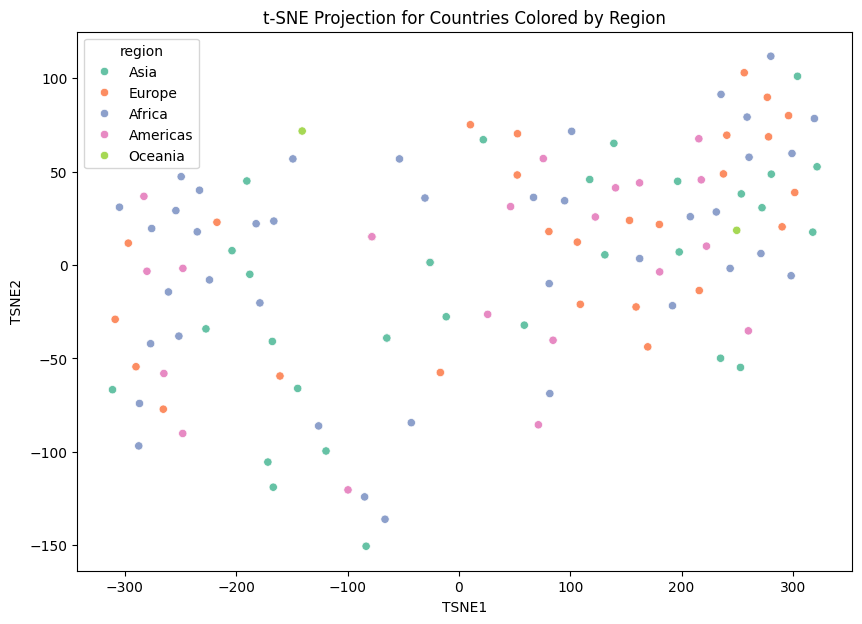

t-SNE on country data applied and plotted successfully.

Applying t-SNE to data_year_scaled...


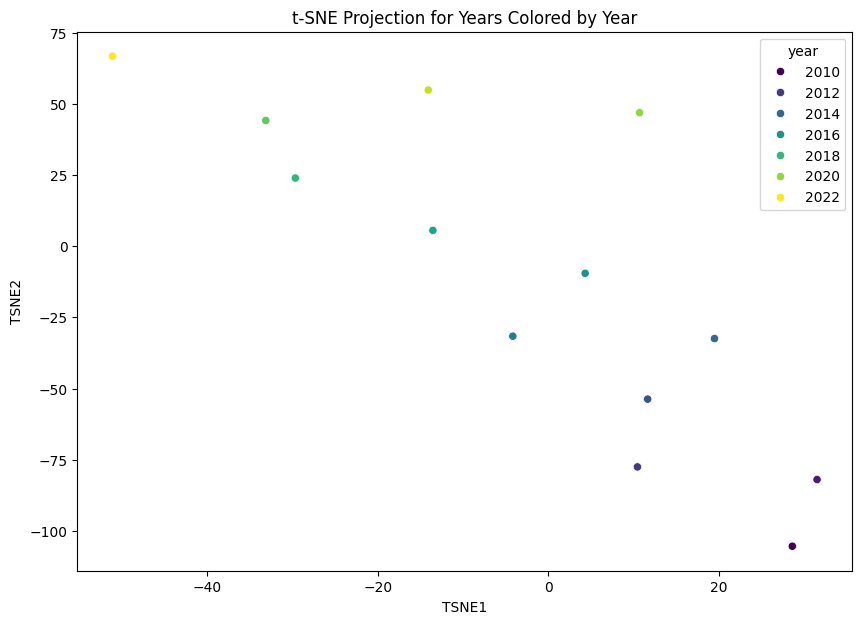

t-SNE on year data applied and plotted successfully.


In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Apply t-SNE to data_country_clean
print("Applying t-SNE to data_country_clean...")
try:
    # Impute missing values before applying t-SNE
    imputer_country = SimpleImputer(strategy='mean')
    numeric_data_country = data_country_clean.select_dtypes(include=np.number)
    imputed_data_country = imputer_country.fit_transform(numeric_data_country)

    tsne_country = TSNE(n_components=2, random_state=42)
    tsne_country_results = tsne_country.fit_transform(imputed_data_country)

    # Create DataFrame with t-SNE results
    tsne_country_df = pd.DataFrame(tsne_country_results, columns=['TSNE1', 'TSNE2'])
    tsne_country_df['country'] = data_country_clean['country'].reset_index(drop=True)
    tsne_country_df['region'] = data_country_clean['region'].reset_index(drop=True)

    # Visualize t-SNE results for country data
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=tsne_country_df, x='TSNE1', y='TSNE2', hue='region', palette='Set2')
    plt.title("t-SNE Projection for Countries Colored by Region")
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.show()
    print("t-SNE on country data applied and plotted successfully.")

except Exception as e:
    print(f"Error applying t-SNE on country data: {e}")

# Apply t-SNE to data_year_scaled
print("\nApplying t-SNE to data_year_scaled...")
try:
    # Impute missing values before applying t-SNE
    imputer_year = SimpleImputer(strategy='mean')
    numeric_data_year = data_year_scaled.select_dtypes(include=np.number).drop(columns=['year']) # Exclude 'year'
    imputed_data_year = imputer_year.fit_transform(numeric_data_year)

    tsne_year = TSNE(n_components=2, random_state=42, perplexity=5) # Reduced perplexity
    tsne_year_results = tsne_year.fit_transform(imputed_data_year)

    # Create DataFrame with t-SNE results
    tsne_year_df = pd.DataFrame(tsne_year_results, columns=['TSNE1', 'TSNE2'])
    tsne_year_df['year'] = data_year_scaled['year'].reset_index(drop=True)

    # Visualize t-SNE results for year data
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=tsne_year_df, x='TSNE1', y='TSNE2', hue='year', palette='viridis') # Using a different palette for years
    plt.title("t-SNE Projection for Years Colored by Year")
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    plt.show()
    print("t-SNE on year data applied and plotted successfully.")

except Exception as e:
    print(f"Error applying t-SNE on year data: {e}")

## 6. Analysis & Discussion

### Why might Kernel PCA better represent the structure in CO₂ and economic data than linear PCA?

Based on the visualizations, Kernel PCA with the RBF kernel appears to show a more complex, non-linear structure in the data compared to the linear PCA.

*   **Linear PCA** assumes that the principal components are linear combinations of the original features. This works well when the relationships between features are mostly linear.
*   **Kernel PCA**, on the other hand, uses a kernel function (like the RBF kernel) to implicitly map the data into a higher-dimensional space where linear separation or structure might be more apparent. It can capture non-linear relationships that linear PCA might miss.

In the context of CO₂ emissions and economic data, it's plausible that the relationships between factors like GDP, population, energy consumption, and CO₂ emissions are not strictly linear. For example, the relationship between economic development and emissions might change over time or vary significantly between countries with different development levels or policies. Kernel PCA, by exploring these non-linearities, might provide a more accurate representation of the underlying structure in the data. The curved structure observed in the Kernel PCA plot for countries suggests that a non-linear model might be a better fit for representing the relationships in this dataset.

### Which method leads to the best visualization and why?

The "best" visualization method depends on what you want to highlight:

*   **Linear PCA:** Provided a clear view of the dominant linear trend over time in the year data. It's good for understanding the main axes of variance and linear relationships.
*   **t-SNE:** For the country data, t-SNE seemed to spread out the points more and potentially revealed more local structure or sub-clusters within regions compared to linear PCA. It's often preferred for visualizing clusters and local relationships.
*   **Kernel PCA (RBF Kernel):** Showed a non-linear structure in the country data which linear PCA did not capture. If the goal is to explore non-linear relationships, Kernel PCA can provide a more informative visualization.

For this specific dataset, the **linear PCA visualization for years** was particularly effective at showing the strong temporal progression. For the **country data**, both **t-SNE** and **Kernel PCA with RBF kernel** offered different perspectives than linear PCA, potentially highlighting non-linear relationships and finer-grained structures or clusters within regions. The choice between t-SNE and Kernel PCA for the country data depends on whether the focus is on preserving local neighborhoods (t-SNE) or capturing non-linear global structures (Kernel PCA).

Ultimately, examining visualizations from multiple dimensionality reduction techniques provides a more comprehensive understanding of the data's structure.

## 7. Conclusion

In this project, we explored a dataset containing CO₂ emissions and related economic and demographic data using various dimensionality reduction techniques: Linear PCA, Kernel PCA (with the RBF kernel), and t-SNE.

We observed that:

*   Linear PCA effectively captured the dominant temporal trend in the data when analyzed by year, showing a clear progression over time. For country data, it revealed some regional clustering but with significant overlap.
*   Kernel PCA with the RBF kernel suggested the presence of non-linear structures in the data, particularly evident in the curved projection of the country data. This highlights that the relationships between the features may not be purely linear.
*   t-SNE provided a different perspective on the country data, potentially revealing more intricate local clustering within regions.

Each technique offered unique insights into the data's underlying structure. The choice of the most suitable dimensionality reduction method depends on the specific goals of the analysis and the nature of the relationships within the data. For datasets with potentially non-linear relationships, Kernel PCA and t-SNE can provide valuable insights that linear PCA might not capture.

## 8. Save your work for submission

To save your work, click on the "File" menu at the top of the notebook and select "Save". Ensure all cells have been executed and the outputs are visible if required for submission.

Follow the instructions provided by your course instructor for submitting your completed notebook. This typically involves downloading the `.ipynb` file to your local machine and uploading it to the designated submission platform.